In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr

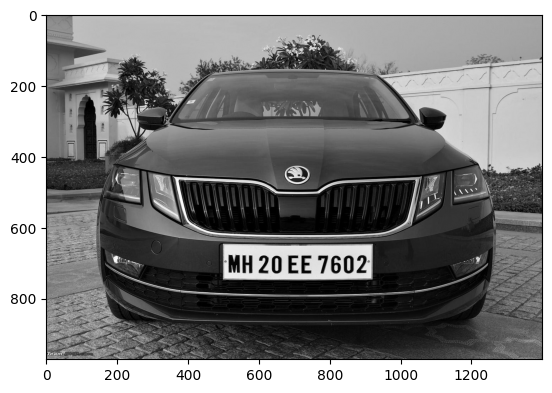

In [221]:
img = cv2.imread("../data/img2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

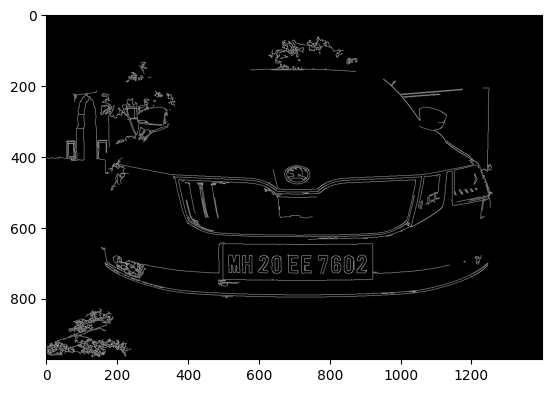

In [241]:
filter = cv2.bilateralFilter(gray, 11, 30, 30)
edges = cv2.Canny(filter, 30, 200)
plt.imshow(edges, cmap='gray')

In [242]:
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:15]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.03 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)
        # License plates are rectangular
        if 2 <= aspect_ratio <= 6:
            location = approx
            break
        
location

array([[[ 374,  468]],

       [[ 440,  605]],

       [[ 974,  608]],

       [[1043,  474]]], dtype=int32)

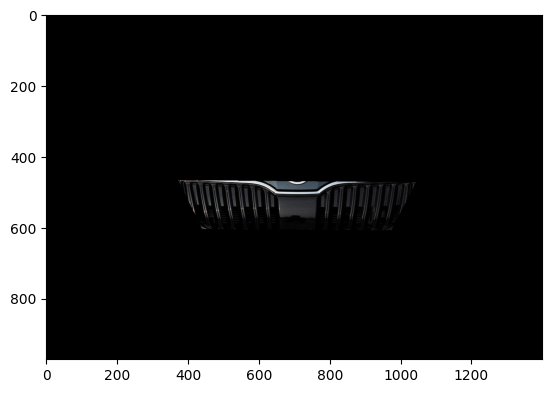

In [238]:
mask = np.zeros(gray.shape, dtype=np.uint8)
cv2.drawContours(mask, [location], -1, 255, thickness=cv2.FILLED)
new_img = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

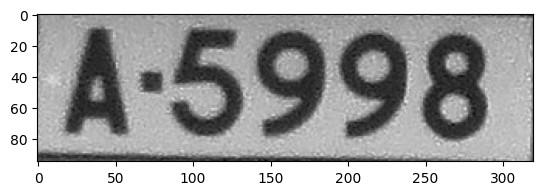

In [220]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cropped_image, cmap='gray')

In [137]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[np.int32(6), 0],
   [np.int32(304), 0],
   [np.int32(304), np.int32(94)],
   [np.int32(6), np.int32(94)]],
  'A.5998',
  np.float64(0.3848328546305162))]

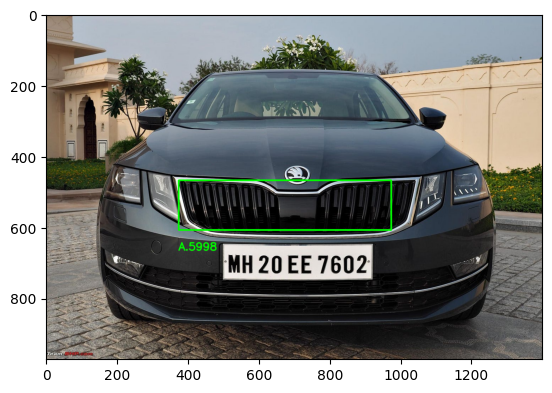

In [246]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))